In [1]:
# 기본 데이터 라이브러리 로드
import sys # 시스템 파라미터에 접근할 수 있게 도와준다.
print("Python version: {}". format(sys.version))

import pandas as pd # 데이터 정제에 도움을 주는 라이브러리
print("pandas version: {}". format(pd.__version__))

import matplotlib # 매트랩에서 사용하는 시각화 도구를 사용할 수 있게 도와주는 시각화 도구
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # 행렬 계산을 위해 필요한 라이브러리
print("NumPy version: {}". format(np.__version__))

import scipy as sp # 수학 관련 함수가 내장된 라이브러리
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # 주피터 노트북에서 예쁘게 시각화 해주는 도구
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # 각종 통계 도구와 머신 러닝 알고리즘이 내장되어 있는 라이브러리
print("scikit-learn version: {}". format(sklearn.__version__))

import tensorflow as tf
print("tensorflow version: {}".format(tf.__version__))

import geopandas as gpd # 공간정보 라이브러리
print("geopandas version: {}".format(gpd.__version__))

# 파이썬 내장 라이브러리
import random
import datetime
import time
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import copy

# 모델링 라이브러리, 수학 계산 툴 로드
# 일반적인 모델링 라이브러리
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# 모델링 시 헬퍼 함수들
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# interpolation 함수
import scipy.interpolate as spi
from scipy import stats

# model load
import pickle
# from sklearn.externals import joblib

# 시각화 도구
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# 시각화 도구 default 세팅
# 주피터 노트북에서 plot 결과를 볼 수 있게 해준다.
%matplotlib inline
mpl.style.use('ggplot') # matplotlib에서 plot되는 결과를 선택할 수 있다.
sns.set_style('white') # seaborn에서 사용할 style을 설정할 수 있다.
pylab.rcParams['figure.figsize'] = 12,8 # plot의 크기와 선 등의 기본 값을 설정할 수 있다.

plt.style.use(['fivethirtyeight'])
sns.set_style('darkgrid')

from IPython.display import display #print가 아닌 display()로 연속 출력
from IPython.display import HTML #출력 결과를 HTML로 생성
import fiona #공간데이터를 딕셔너리 형태 등으로 접근할 수 있는 라이브러리

# 좌표계 정의/변환용 라이브러리
import pyproj

# 좌표간의 거리 구하기 위한 라이브러리
from haversine import haversine

# Jupyter Notebook 이나 ipython 을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message)를 뜨지 않게 해준다.
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# 뒤에서 overlay를 활용하기 위함. 설치 후 런타임 다시 시작할 것
import rtree
import pathlib
#from geoband import API

import mapclassify

Python version: 3.8.8 (tags/v3.8.8:024d805, Feb 19 2021, 13:18:16) [MSC v.1928 64 bit (AMD64)]
pandas version: 1.4.3
matplotlib version: 3.5.2
NumPy version: 1.22.4
SciPy version: 1.8.1
IPython version: 8.4.0
scikit-learn version: 1.1.1
tensorflow version: 2.9.1
geopandas version: 0.11.0
-------------------------


In [29]:
df = pd.read_csv("dataset\전국_심야약국.csv", encoding='cp949', header=1)
df = df[df['도로명주소'].str.startswith("서울")]
df = df.reset_index(drop=1)
df = df.drop('지번주소', axis=1)
df

,약국명,대표전화,도로명주소,월요일,화요일,수요일,목요일,금요일,토요일,일요일,공휴일
0,365열린약국,02-874-2332,서울특별시 관악구 남부순환로 1615 (신림동),09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,10:00~23:00,10:00~23:00
1,365열린약국,02-3666-0784,"서울특별시 구로구 남부순환로97길 3, KS프리미어빌딩 105호 (개봉동)",08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30
2,365열린약국,02-2633-2800,"서울특별시 영등포구 영중로 119, 리마크빌 영등포 2층 204-2호 (영등포동8가)",09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00
3,365정화약국,02-935-4869,"서울특별시 노원구 상계로 59, 동익빌딩 1층 7,8호 (상계동)",09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,13:00~23:00,13:00~23:00
4,365종로약국,02-2215-8704,"서울특별시 동대문구 전농로 60-1, 1층 (답십리동)",08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00
...,...,...,...,...,...,...,...,...,...,...,...
174,홍대어울림약국,02-332-9233,"서울특별시 마포구 어울마당로 128, 1층 (서교동)",11:00~22:30,11:00~22:30,11:00~22:30,11:00~22:30,11:00~22:30,11:00~22:30,11:00~22:30,NaN
175,홍대참신한약국,02-6368-5799,"서울특별시 마포구 어울마당로 62, 1층 (서교동)",12:00~23:00,12:00~23:00,12:00~23:00,12:00~23:00,12:00~25:00,12:00~25:00,12:00~23:00,12:00~23:00
176,화랑온누리약국,02-975-4151,서울특별시 노원구 공릉로 150 (공릉동) 1층,08:45~22:30,08:45~22:30,08:45~22:30,08:45~22:30,08:45~22:00,08:45~22:00,17:00~22:30,NaN
177,환승센터약국,02-424-2365,"서울특별시 송파구 잠실로 지하 156, 잠실광역환승센터 지하1층 101호 (신천동)",08:00~23:00,08:00~23:00,08:00~23:00,08:00~23:00,08:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00


In [30]:
df.to_csv("dataset/Seoul_pharmacy.csv", index=False)

---

In [65]:
df = pd.read_csv("dataset\PreprocessData\Seoul_pharmacy.csv")
df

,약국명,대표전화,도로명주소,월요일,화요일,수요일,목요일,금요일,토요일,일요일,공휴일,X,Y
0,365열린약국,02-874-2332,서울특별시 관악구 남부순환로 1615 (신림동),09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,10:00~23:00,10:00~23:00,126.930087,37.484556
1,365열린약국,02-3666-0784,"서울특별시 구로구 남부순환로97길 3, KS프리미어빌딩 105호 (개봉동)",08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,126.858255,37.493996
2,365열린약국,02-2633-2800,"서울특별시 영등포구 영중로 119, 리마크빌 영등포 2층 204-2호 (영등포동8가)",09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,126.905231,37.526766
3,365정화약국,02-935-4869,"서울특별시 노원구 상계로 59, 동익빌딩 1층 7,8호 (상계동)",09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,13:00~23:00,13:00~23:00,127.061515,37.656160
4,365종로약국,02-2215-8704,"서울특별시 동대문구 전농로 60-1, 1층 (답십리동)",08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,127.057409,37.570289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,홍대어울림약국,02-332-9233,"서울특별시 마포구 어울마당로 128, 1층 (서교동)",11:00~22:30,11:00~22:30,11:00~22:30,11:00~22:30,11:00~22:30,11:00~22:30,11:00~22:30,NaN,126.924295,37.555720
175,홍대참신한약국,02-6368-5799,"서울특별시 마포구 어울마당로 62, 1층 (서교동)",12:00~23:00,12:00~23:00,12:00~23:00,12:00~23:00,12:00~25:00,12:00~25:00,12:00~23:00,12:00~23:00,126.921429,37.550601
176,화랑온누리약국,02-975-4151,서울특별시 노원구 공릉로 150 (공릉동) 1층,08:45~22:30,08:45~22:30,08:45~22:30,08:45~22:30,08:45~22:00,08:45~22:00,17:00~22:30,NaN,127.079576,37.623373
177,환승센터약국,02-424-2365,"서울특별시 송파구 잠실로 지하 156, 잠실광역환승센터 지하1층 101호 (신천동)",08:00~23:00,08:00~23:00,08:00~23:00,08:00~23:00,08:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,127.101753,37.511320


In [32]:
import pandas as pd
from collections import OrderedDict
import geopandas
import libpysal
from libpysal import cg, examples
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import numpy
import ortools
from ortools.linear_solver import pywraplp
import seaborn
import shapely
from shapely.geometry import Point
import spaghetti
import sys

%matplotlib inline

# 한글폰트
import os
from matplotlib import font_manager, rc
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False 

import numpy as np
import folium

In [34]:
emd = geopandas.read_file('dataset\EMD_20220324\emd.shp', encoding = 'euc-kr')
emd = emd.to_crs(epsg=4326)
sig = geopandas.read_file('dataset\SIG_20220324\sig.shp', encoding = 'euc-kr')
sig = sig.to_crs(epsg=4326)

In [39]:
seoul_EMD = emd[emd['EMD_CD'].str.startswith('11')]
seoul_sig = sig[sig['SIG_CD'].str.startswith('11')]

display(seoul_EMD.head())
display(seoul_sig.head())

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,11110102,Singyo-dong,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
4,11110105,Changseong-dong,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."


,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((127.00864 37.58047, 127.00871 37.580..."
1,11140,Jung-gu,중구,"POLYGON ((127.02314 37.57196, 127.02336 37.571..."
2,11170,Yongsan-gu,용산구,"POLYGON ((126.96918 37.55566, 126.96917 37.554..."
3,11200,Seongdong-gu,성동구,"POLYGON ((127.04341 37.57234, 127.04524 37.571..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."


0      126.930087
1      126.858255
2      126.905231
3      127.061515
4      127.057409
          ...    
174    126.924295
175    126.921429
176    127.079576
177    127.101753
178    127.041324
Name: X, Length: 179, dtype: float64

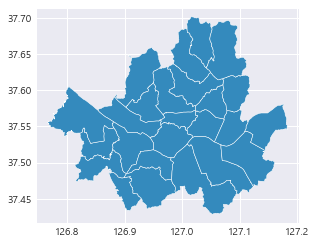

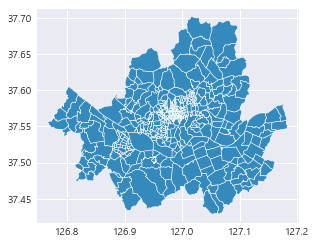

In [48]:
seoul_sig.plot()
seoul_EMD.plot()

In [67]:
df2.head(1)

,약국명,대표전화,도로명주소,월요일,화요일,수요일,목요일,금요일,토요일,일요일,공휴일,X,Y
0,365열린약국,02-874-2332,서울특별시 관악구 남부순환로 1615 (신림동),09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,10:00~23:00,10:00~23:00,126.930087,37.484556


In [68]:
df['경도'] = df['X'].astype(float)
df['위도'] = df['Y'].astype(float)
df['geometry'] = df.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
df = gpd.GeoDataFrame(df, geometry='geometry')

df = df.drop('X', axis=1)
df = df.drop('Y', axis=1)
df.head()

,약국명,대표전화,도로명주소,월요일,화요일,수요일,목요일,금요일,토요일,일요일,공휴일,경도,위도,geometry
0,365열린약국,02-874-2332,서울특별시 관악구 남부순환로 1615 (신림동),09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,10:00~23:00,10:00~23:00,126.930087,37.484556,POINT (126.93009 37.48456)
1,365열린약국,02-3666-0784,"서울특별시 구로구 남부순환로97길 3, KS프리미어빌딩 105호 (개봉동)",08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,126.858255,37.493996,POINT (126.85826 37.49400)
2,365열린약국,02-2633-2800,"서울특별시 영등포구 영중로 119, 리마크빌 영등포 2층 204-2호 (영등포동8가)",09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,126.905231,37.526766,POINT (126.90523 37.52677)
3,365정화약국,02-935-4869,"서울특별시 노원구 상계로 59, 동익빌딩 1층 7,8호 (상계동)",09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,09:00~23:00,13:00~23:00,13:00~23:00,127.061515,37.656160,POINT (127.06152 37.65616)
4,365종로약국,02-2215-8704,"서울특별시 동대문구 전농로 60-1, 1층 (답십리동)",08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,08:00~24:00,127.057409,37.570289,POINT (127.05741 37.57029)


In [82]:
df.columns

Index(['약국명', '대표전화', '도로명주소', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일',
       '공휴일', '경도', '위도', 'geometry'],
      dtype='object')

In [69]:
print(seoul_EMD.crs)
print(df.crs)
df.crs = {'init':'epsg:4326'}
print(df.crs)
df = df.to_crs({'init':'epsg:5179'})
print(df.crs)

epsg:4326
None
+init=epsg:4326 +type=crs
+init=epsg:5179 +type=crs


In [73]:
seoul_EMD = seoul_EMD.to_crs({'init':'epsg:5179'})

In [76]:
seoul_sig = seoul_sig.to_crs({'init':'epsg:5179'})

In [74]:
print(seoul_EMD.crs)

+init=epsg:5179 +type=crs


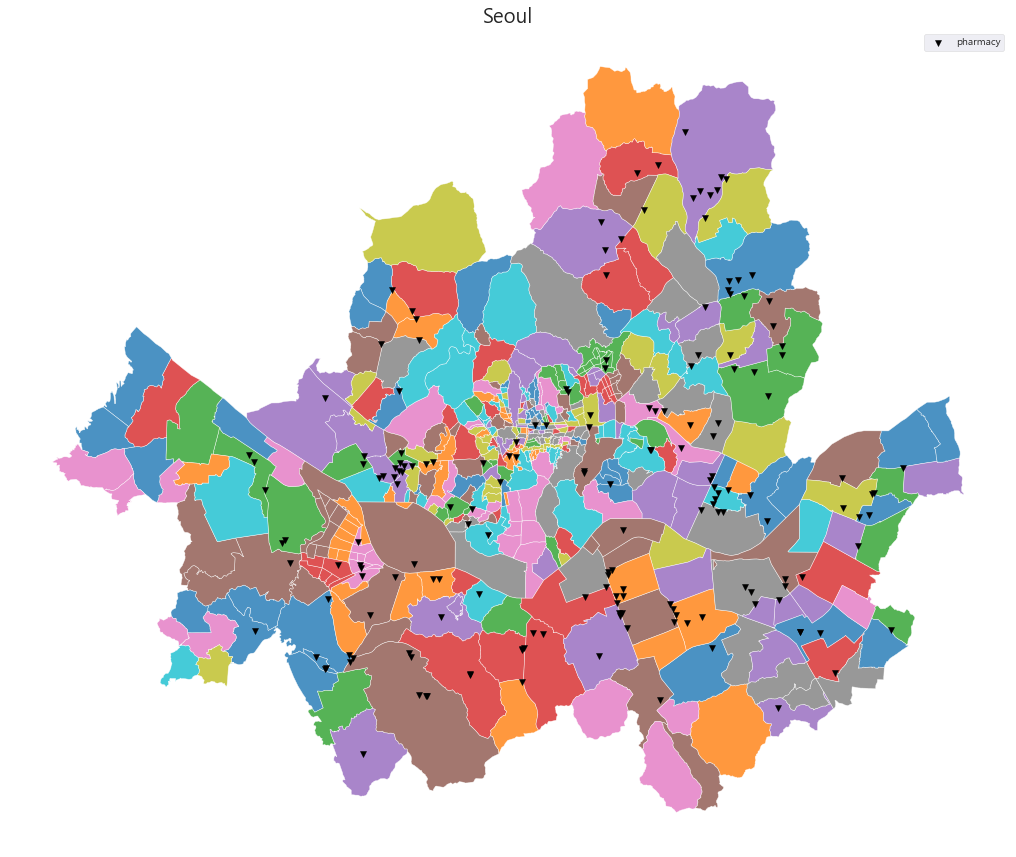

In [80]:
ax = seoul_EMD.plot(column="EMD_KOR_NM", figsize=(16,16), alpha=0.8)
df.plot(ax=ax, marker='v', color='black', label='pharmacy')
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

In [77]:
seoul_sig

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."
5,11230,Dongdaemun-gu,동대문구,"POLYGON ((962141.919 1956519.461, 962149.853 1..."
6,11260,Jungnang-gu,중랑구,"POLYGON ((965698.531 1957987.355, 965772.290 1..."
7,11290,Seongbuk-gu,성북구,"POLYGON ((956787.318 1953542.506, 956761.258 1..."
8,11305,Gangbuk-gu,강북구,"POLYGON ((956316.789 1965175.345, 956401.551 1..."
9,11320,Dobong-gu,도봉구,"POLYGON ((957223.835 1961199.545, 957195.758 1..."


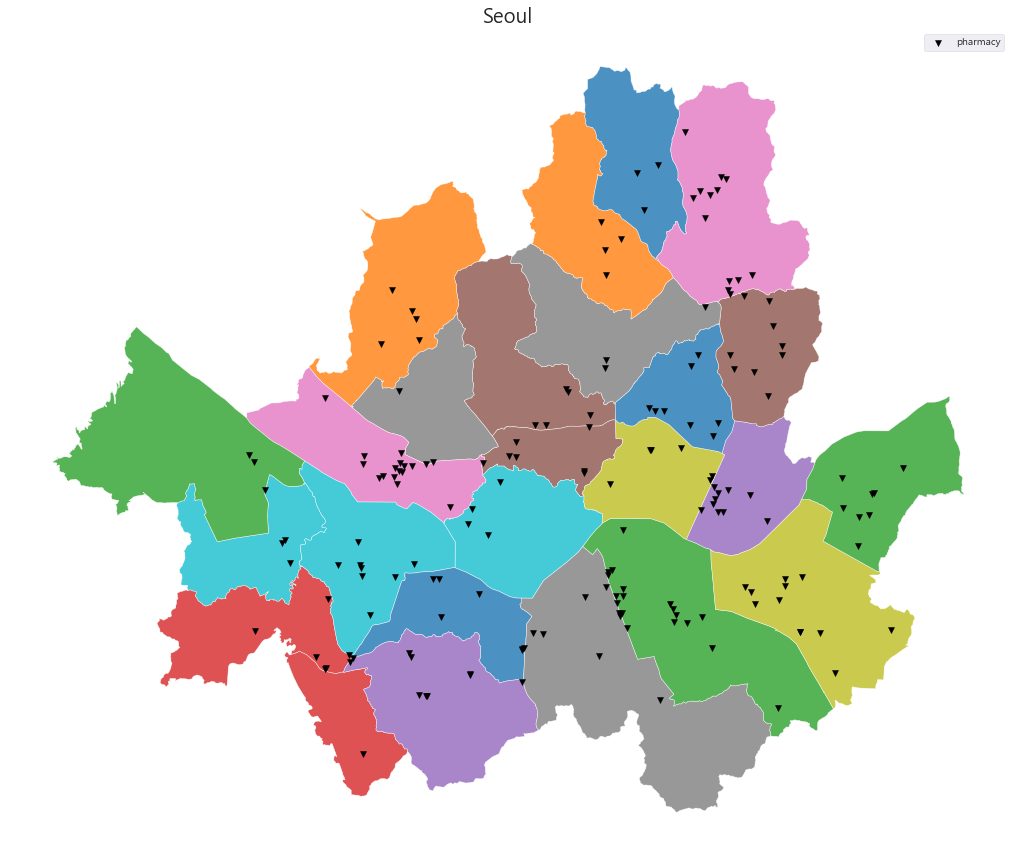

In [81]:
ax = seoul_sig.plot(column="SIG_ENG_NM", figsize=(16,16), alpha=0.8)
df.plot(ax=ax, marker='v', color='black', label='pharmacy')
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()